<a href="https://colab.research.google.com/github/YatinG021/-image-Classification-model-using-CNN-/blob/main/Dogs_vs_Cats_(Image_Classification_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
# Make a .kaggle directory and move API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats
!unzip -q dogs-vs-cats.zip

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:07<00:00, 46.8MB/s]
100% 1.06G/1.06G [00:07<00:00, 150MB/s] 


In [4]:
# importing required Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
# Generators
# Using TensorFlow's image_dataset_from_directory to create training and validation datasets:

BATCH_SIZE = 32
IMG_SIZE = (256, 256)

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="train",
    labels='inferred',
    label_mode= 'int',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory="train",
    labels='inferred',
    label_mode= 'int',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


Now , here the files are stored in the numpy arrays format
**(Range = 0-255)**,
We need to store files in the
**(Range = 0-1)**,
Hence, we Normalize the data








In [6]:
# Normalize
def preprocess(images, labels):
    return images / 255.0, labels

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

In [7]:
# Create CNN Model
# Making an architecture of 3 convolutional Layers :
# 1. 32 filters , 2. 64 filters , 3. 128 filters

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# compile and train the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=val_ds)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5822 - loss: 0.6779 - val_accuracy: 0.6795 - val_loss: 0.5924
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 68ms/step - accuracy: 0.7088 - loss: 0.5655 - val_accuracy: 0.7610 - val_loss: 0.5027
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.7785 - loss: 0.4604 - val_accuracy: 0.7455 - val_loss: 0.5366
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.8425 - loss: 0.3523 - val_accuracy: 0.7750 - val_loss: 0.5445
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.9079 - loss: 0.2224 - val_accuracy: 0.7645 - val_loss: 0.7217
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9482 - loss: 0.1361 - val_accuracy: 0.7370 - val_loss: 1.0916
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 77ms/step - accuracy: 0.9629 - loss: 0.1039 - val_accuracy: 0.7347 - val_loss: 1.2815
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 68ms/step - accuracy: 0.9721 - loss: 0.0757 - 

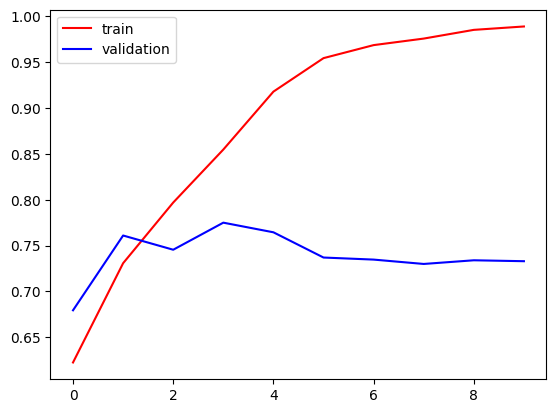

In [14]:
# visualising the train vs test accuracy graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

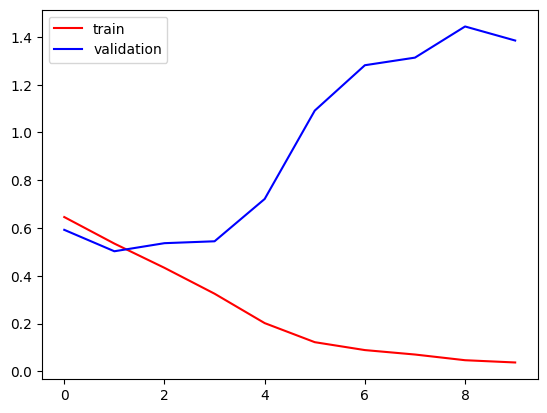

In [15]:
# plotting validation(test data) loss and training(train data) loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Hence, we can clearly see, that there is overfittig in the data.
As **train data results are good** but **test data results are not efficient.**
So , to reduce overfittig , We can use the following methods:

In [9]:
# ways to reduce overfittig

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [10]:
# Now , predicting on unseen new (image) data from internet